<a href="https://colab.research.google.com/github/sanchita21/Big-Mart-Sales-Prediction/blob/master/Big_Mart_Item_Outlet_Sales_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduction**
---

**Problem Statement**

Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. The aim is to build a predictive model  to predict the sales of each product at particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.The data set has two parts:Training and Test. The Training 8523 observations and the Test data set has 5681 observations. we need to predict the sales for test data set.

# #Description of the variables 

**Variable :                                             Description**

Item_Identifier :                              Unique product ID

Item_Weight :                                  Weight of product

Item_Fat_Content :                         Whether the product is low fat or not

Item_Visibility :                                The % of total display area of all products in a store allocated to the particular product

Item_Type :                                       The category to which the product belongs

Item_MRP :                                       Maximum Retail Price (list price) of the product

Outlet_Identifier :                             Unique store ID

Outlet_Establishment_Year :         The year in which store was established

Outlet_Size :                                      The size of the store in terms of ground area covered

Outlet_Location_Type :                    The type of city in which the store is located

Outlet_Type :                                     Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales :                          Sales of the product in the particulat store. This is the outcome variable to be predicted

#Workflow


1. Data Understanding - understanding the attributes of the data and
the data dictionary, data quality check
2.Data Exploration and hypothesis- Understandinng the data through descriptive analytics which includes visualizing the attributes,
   checking for the redundant data and checking the relationships between the variables.
    Hypothesis involves understanding the problem and making some hypothesis about what factors could potentially affect the outcome of the problem statement. This step should be done BEFORE looking at the data.
3. Data cleaning:- checking and deleting redundant data. Finding out
the missing data.
4. Data preparation:- computing values for missing data. generating
any derived attributes if necessary.
5. Modelling:- Selecting the technique to predict, building the model
using the variables as per their importance.
6.Evaluation:- Assessing the model using the test data which will
comprise 30 % of the total data.The model performance will be evaluated on the basis of its prediction of the sales for the test data. Big Mart will use Root Mean Square Error (RMSE) value to judge your response.

## Import Libraries

In [0]:

library(ggplot2)      #for visualization
library(dplyr)        # for data manipulation



#installing packages 

In [43]:
install.packages("VIM")     #for imputation of missing values
library(VIM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Import Dataset  (Training)


In [117]:
train_bigmart<-read.csv("Train_BigMart.csv")
head(train_bigmart)  
#checking the first 10 observations to see whether  the data imported correctly

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


#Importing the dataset (Test)

In [118]:
test_bigmart<-read.csv("Test_BigMart.csv")
head(test_bigmart)
#checking the first 10 observations

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>
FDW58,20.750,Low Fat,0.007564836,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.300,reg,0.038427677,Dairy,87.3198,OUT017,2007,,Tier 2,Supermarket Type1
NCN55,14.600,Low Fat,0.099574908,Others,241.7538,OUT010,1998,,Tier 3,Grocery Store
FDQ58,7.315,Low Fat,0.015388393,Snack Foods,155.0340,OUT017,2007,,Tier 2,Supermarket Type1
FDY38,NA,Regular,0.118599314,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
FDH56,9.800,Regular,0.063817206,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1


#Data Exploration for understanding the variables **


In [119]:


summary(train_bigmart$Outlet_Size)
# # outlet size var has some null values ,we have to put NA there as there is only blank 

summary(train_bigmart$Item_Fat_Content)
 # if we look at the fat content we find that there are 2 levels low fat and regular 
# but low fat is encoded as 'LF','LOW FAT','low fat' and Regular as 'Regular' and 'reg'
# # so we have to change it in same case either upper or lower

str(train_bigmart$Item_Type)
# the item type has 16 levels ,we can do some bucketing according to the food type as making 16 dummy var will lead to 
#more complex model




High Medium  Small 
  2410    932   2793   2388

LF low fat Low Fat     reg Regular 
    316     112    5089     117    2889

 Factor w/ 16 levels "Baking Goods",..: 5 15 11 7 10 1 14 14 6 6 ...


## Appending training and test data and creating a master dataset

we will add training and test data for data cleaning,visualization and data prep purpose so that we don't have to do the same job again while deploying our model.
 For adding purpose both the dataset should have same number of col so we will add a col to the test data containing NA values 
 test [,Item_Outlet_Sales := NA]


In [120]:

str(test_bigmart)
test_bigmart$Item_Outlet_Sales<-NA  #this will create a new column with NA values


# appending the training and the test for data cleaning and prep
master<-rbind(train_bigmart,test_bigmart)
dim(master)   
#checking the dimensions of the new combined data
summary(is.na(master))
#checking for the NA values which we passed 


'data.frame':	5681 obs. of  11 variables:
 $ Item_Identifier          : Factor w/ 1543 levels "DRA12","DRA24",..: 1104 1068 1407 810 1185 462 605 267 669 171 ...
 $ Item_Weight              : num  20.75 8.3 14.6 7.32 NA ...
 $ Item_Fat_Content         : Factor w/ 5 levels "LF","low fat",..: 3 4 3 3 5 5 5 3 5 3 ...
 $ Item_Visibility          : num  0.00756 0.03843 0.09957 0.01539 0.1186 ...
 $ Item_Type                : Factor w/ 16 levels "Baking Goods",..: 14 5 12 14 5 7 1 1 14 1 ...
 $ Item_MRP                 : num  107.9 87.3 241.8 155 234.2 ...
 $ Outlet_Identifier        : Factor w/ 10 levels "OUT010","OUT013",..: 10 3 1 3 6 9 4 6 8 3 ...
 $ Outlet_Establishment_Year: int  1999 2007 1998 2007 1985 1997 2009 1985 2002 2007 ...
 $ Outlet_Size              : Factor w/ 4 levels "","High","Medium",..: 3 1 1 1 3 4 3 3 1 1 ...
 $ Outlet_Location_Type     : Factor w/ 3 levels "Tier 1","Tier 2",..: 1 2 3 2 3 1 3 3 2 2 ...
 $ Outlet_Type              : Factor w/ 4 levels "Grocery Store",.

[1] 14204    12

 Item_Identifier Item_Weight     Item_Fat_Content Item_Visibility
 Mode :logical   Mode :logical   Mode :logical    Mode :logical  
 FALSE:14204     FALSE:11765     FALSE:14204      FALSE:14204    
                 TRUE :2439                                      
 Item_Type        Item_MRP       Outlet_Identifier Outlet_Establishment_Year
 Mode :logical   Mode :logical   Mode :logical     Mode :logical            
 FALSE:14204     FALSE:14204     FALSE:14204       FALSE:14204              
                                                                            
 Outlet_Size     Outlet_Location_Type Outlet_Type     Item_Outlet_Sales
 Mode :logical   Mode :logical        Mode :logical   Mode :logical    
 FALSE:14204     FALSE:14204          FALSE:14204     FALSE:8523       
                                                      TRUE :5681       

# Summarising outlet sales by item type and outlet identifier

In [48]:
# grouping the dependent var i.e outlet sales based on the independent var

train_bigmart%>%
            select(Item_Outlet_Sales,Item_Type)%>%
            group_by(Item_Type)%>%
            summarise(sum_sales=sum(Item_Outlet_Sales))%>%arrange(desc(sum_sales))
# fruits and veggies have the highest sales followed by snack food and sea food has the lowest sales


Item_Type,sum_sales
<fct>,<dbl>
Fruits and Vegetables,2820059.8
Snack Foods,2732786.1
Household,2055493.7
Frozen Foods,1825734.8
Dairy,1522594.1
Canned,1444151.5
Baking Goods,1265525.3
Health and Hygiene,1045200.1
Meat,917565.6


## Sumarizing outlet sales by item type

In [49]:
train_bigmart%>%
            select(Outlet_Identifier,Item_Outlet_Sales,Item_Type)%>%
            group_by(Item_Type,Outlet_Identifier)%>%
            summarise(sum_sales=sum(Item_Outlet_Sales))%>%arrange(desc(sum_sales))
# outlet 27 has the highest sales i.e of fruits and veggies , snack food as well as household


Item_Type,Outlet_Identifier,sum_sales
<fct>,<fct>,<dbl>
Fruits and Vegetables,OUT027,576028.2
Snack Foods,OUT027,513088.1
Household,OUT027,378299.6
Snack Foods,OUT035,355573.8
Snack Foods,OUT049,350244.1
Fruits and Vegetables,OUT013,341526.8
Fruits and Vegetables,OUT049,335113.8
Fruits and Vegetables,OUT045,326414.4
Fruits and Vegetables,OUT017,319504.1


## Histogram of outlet sales (dependent variable)

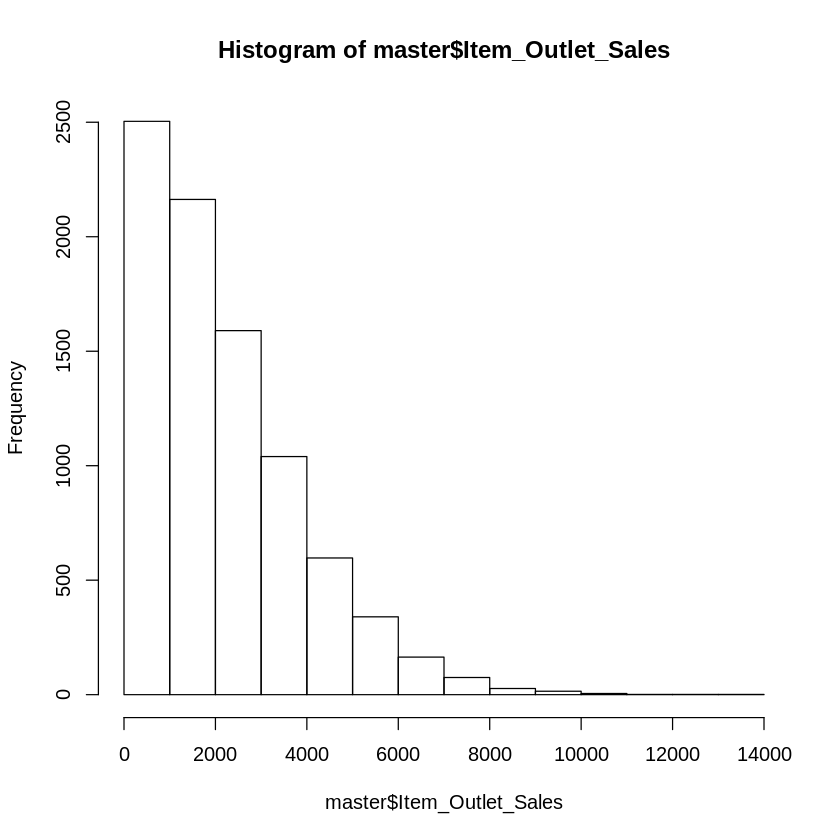

In [50]:


hist(master$Item_Outlet_Sales)
# if we look at the hist we find that data is skewed to the right.we have greater mean thn the median
# we can use log to normalize the data



## Histogram of Item weight

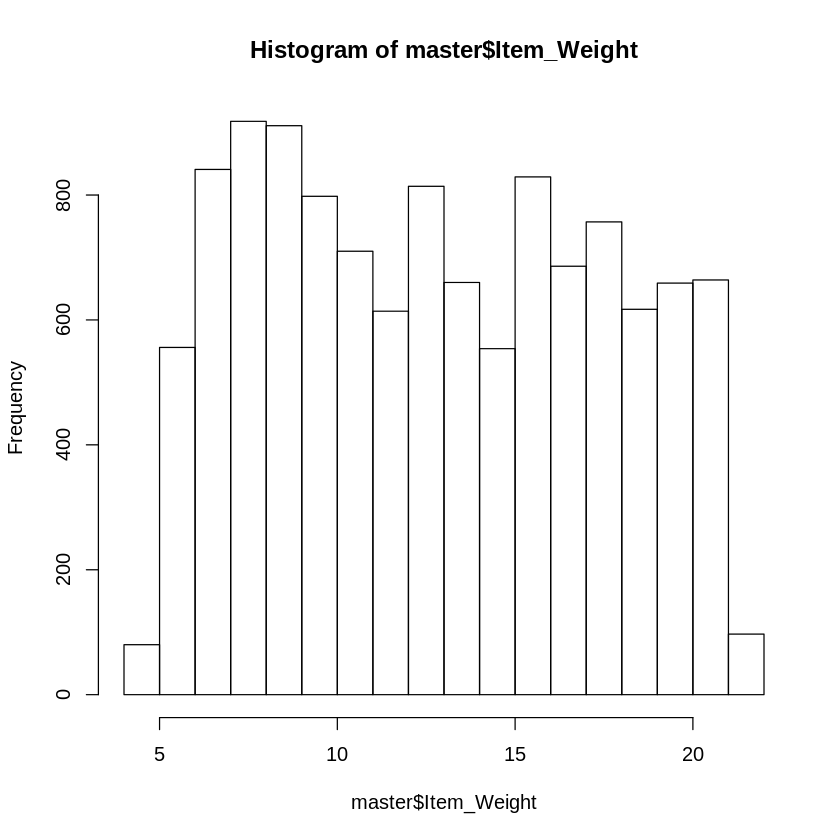

In [51]:
hist(master$Item_Weight)
#we see that the weights of the product are not much skewed .



#hist of Item Visibility

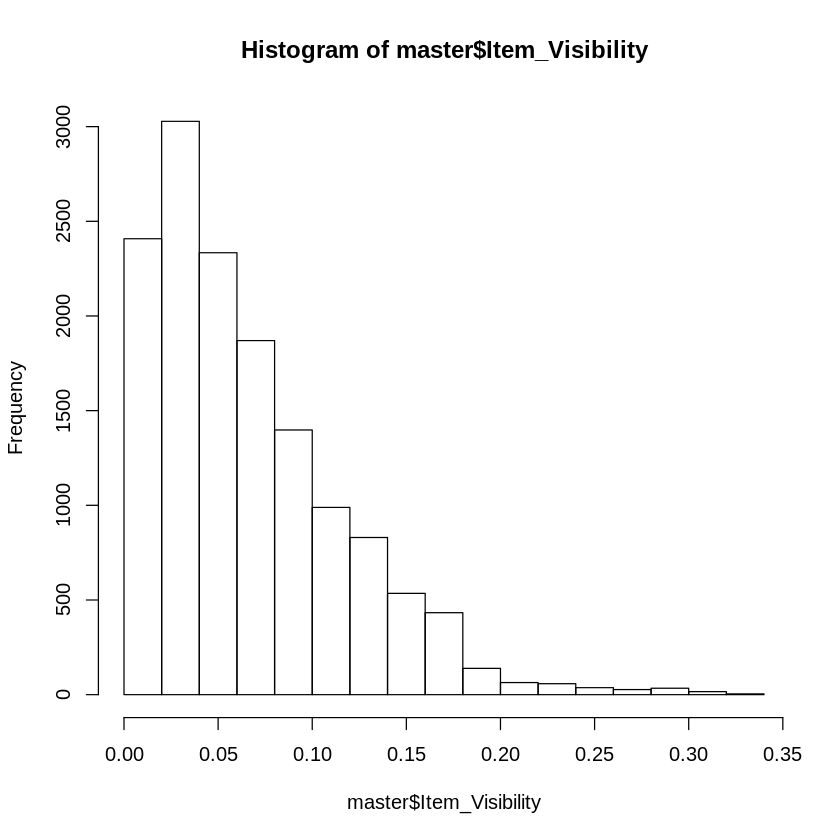

In [52]:
hist(master$Item_Visibility)
# item visibility is also right skewed which means mean is greater thn the median

#boxplot (outlet identifier ,item weight)

Warning message:
“Removed 2439 rows containing non-finite values (stat_boxplot).”

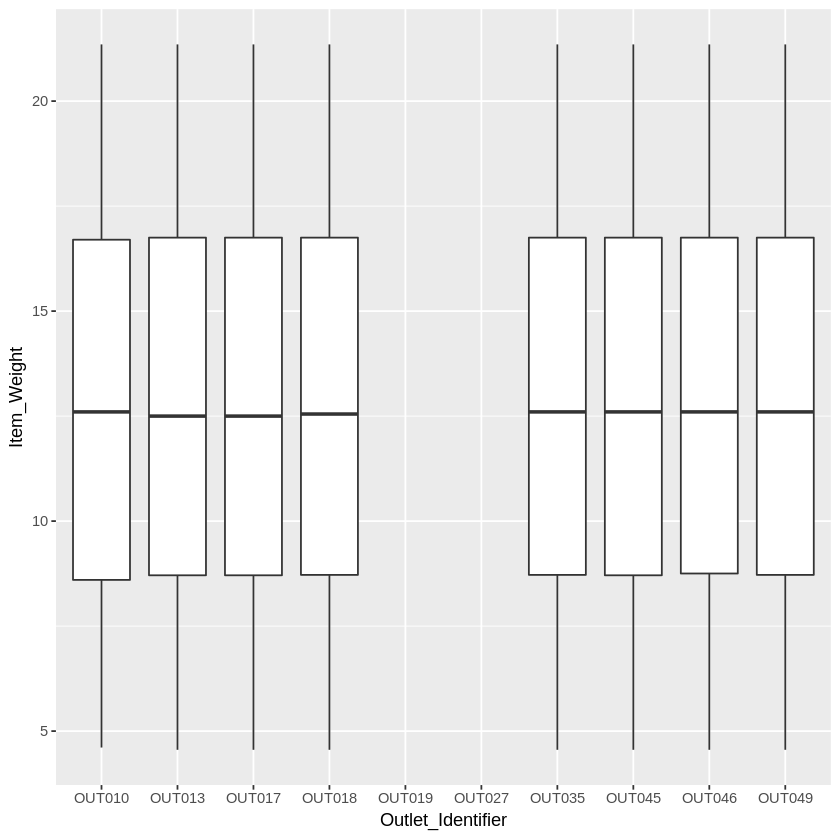

In [53]:

ggplot(master,aes(Outlet_Identifier,Item_Weight))+geom_boxplot()
# we find that only the weight of outlet 19 and outlet 27 is missing



#boxplot(item type,item weight)

Warning message:
“Removed 2439 rows containing non-finite values (stat_boxplot).”

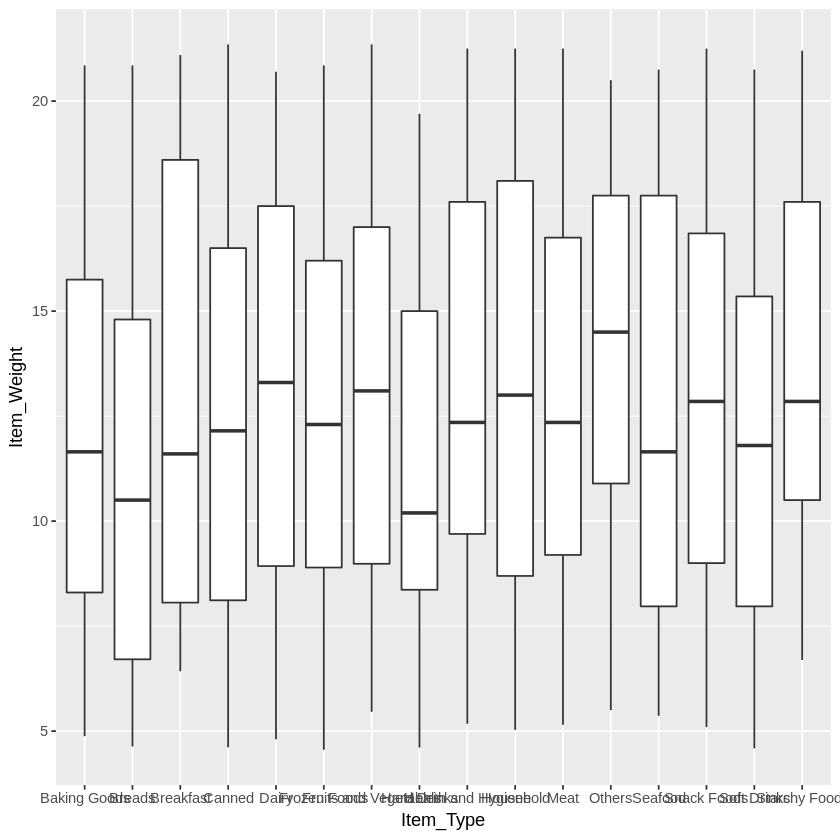

In [54]:
ggplot(master,aes(Item_Type,Item_Weight))+geom_boxplot()
#we find that item weights for all the item types are available.

#boxplot(item type,item visiibility)

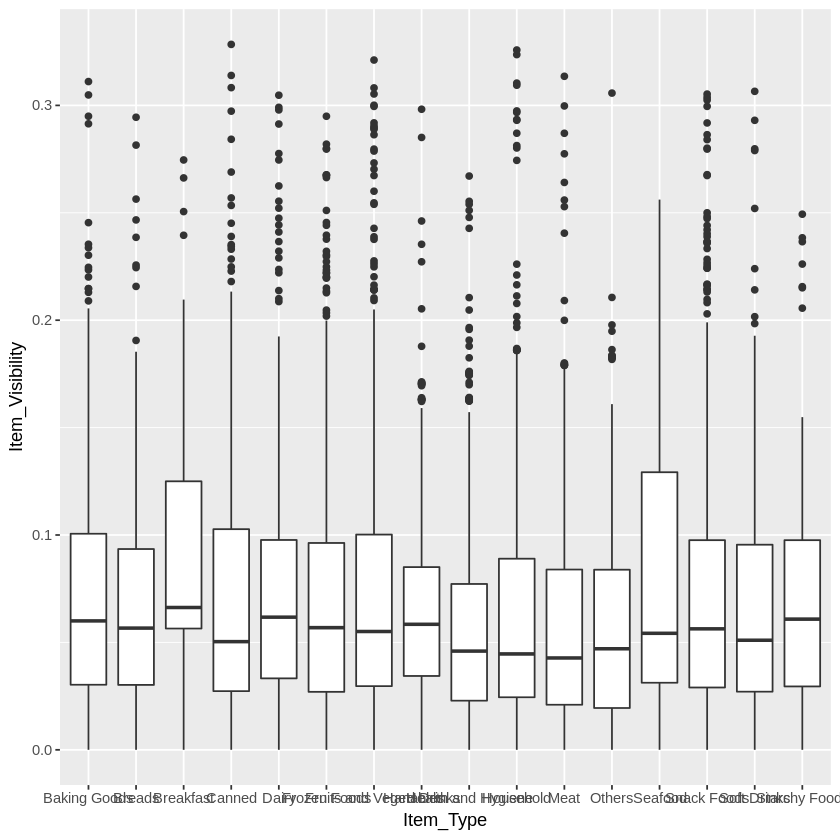

In [55]:
ggplot(master,aes(Item_Type,Item_Visibility))+geom_boxplot()
# the dots show the outliers for each item type

#scatter plot of item sales and item visibility based on different item types.

Warning message:
“Removed 5681 rows containing missing values (geom_point).”

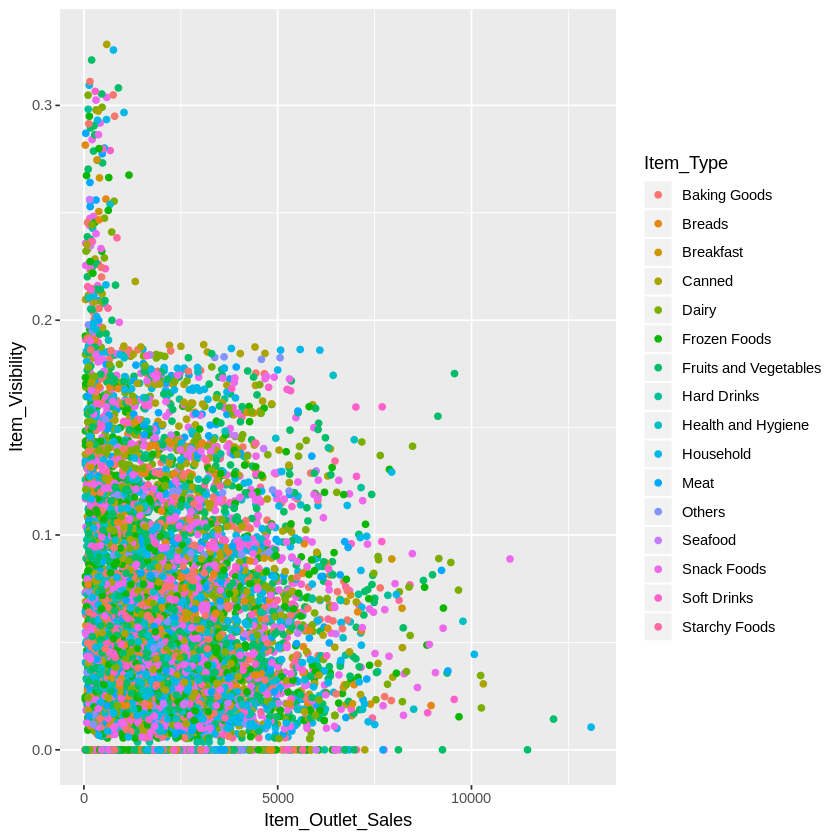

In [56]:
ggplot(master,aes(x=Item_Outlet_Sales,Item_Visibility,col=Item_Type))+ geom_point()
#what can we infer from this scatter plot??????     ****************

#scatter plot of outlet sales (DV) and item visibility based on outlet location

Warning message:
“Removed 5681 rows containing missing values (geom_point).”

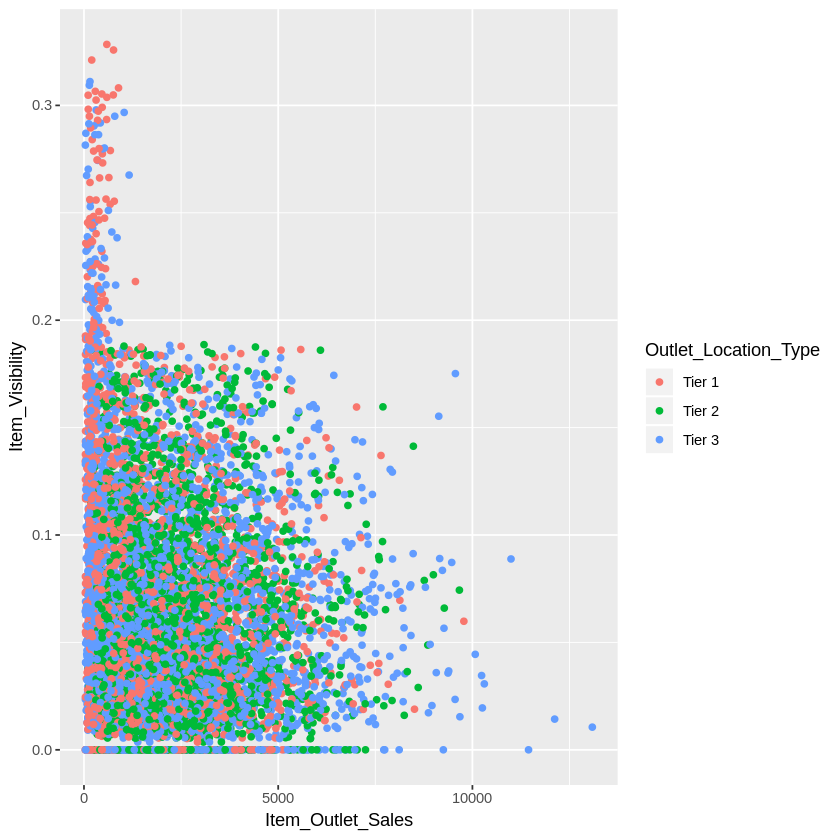

In [57]:
ggplot(master,aes(x=Item_Outlet_Sales,Item_Visibility,col=Outlet_Location_Type))+ geom_point()


#scatter plot of MRP and outlet sales grouped by outlet location

Warning message:
“Removed 5681 rows containing missing values (geom_point).”

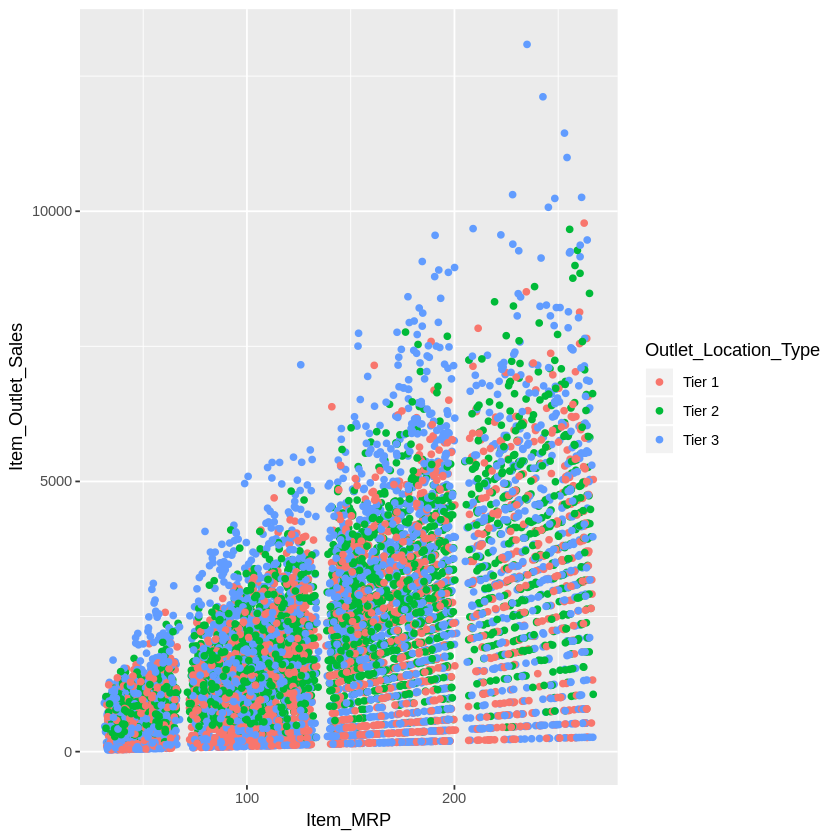

In [58]:
ggplot(master,aes(y=Item_Outlet_Sales,x=Item_MRP,col=Outlet_Location_Type))+ geom_point()
#there are 4 categories in which mrp is divided
# *************Wht could be the possible reasons for this?

#bar of oulet type based on frequency

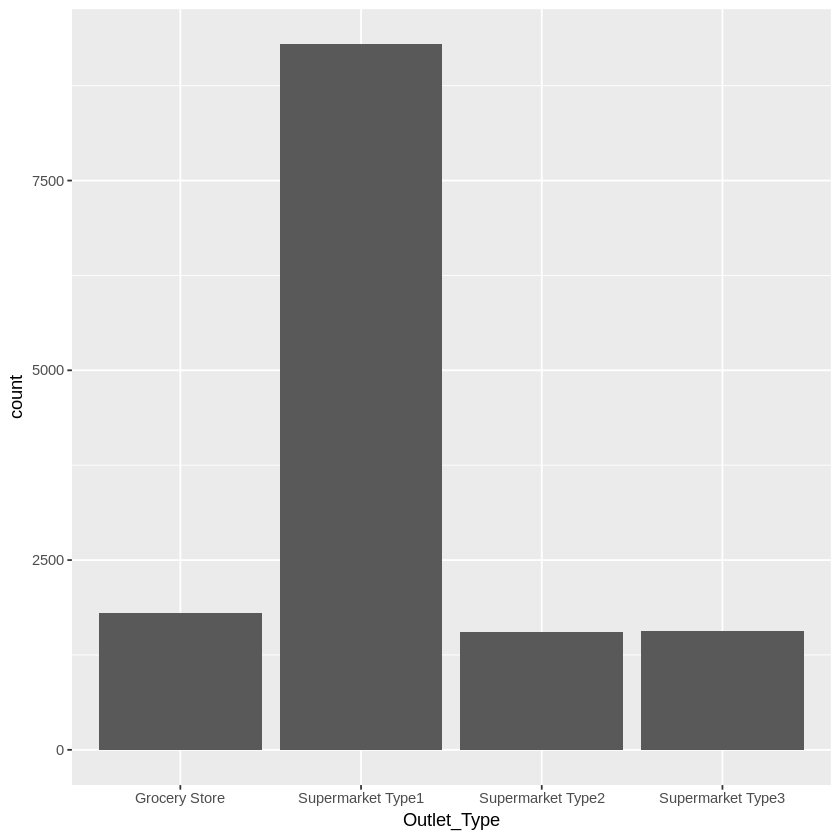

In [59]:

ggplot(master,aes(Outlet_Type))+geom_bar(stat="count")
# outlet type (sypermarket 1) has the highhest number.so it is the most popular.


#bar of outlet establishment year based on count

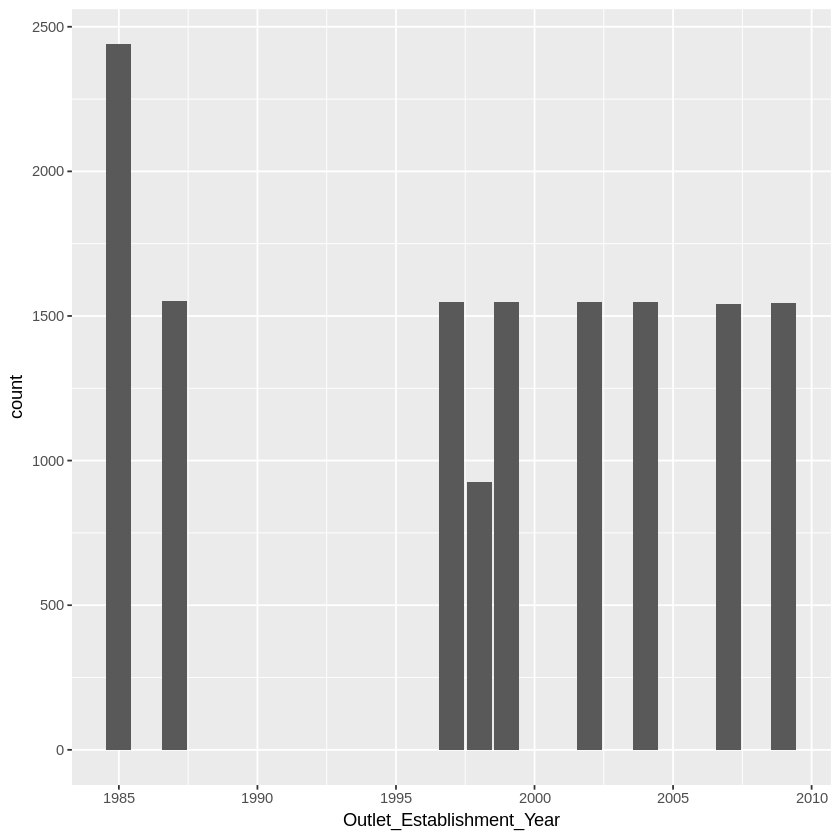

In [60]:


ggplot(master,aes(Outlet_Establishment_Year))+geom_bar(stat="count")
#No outlets were established in the year 1987 to 1996...In 1998 lowest number of outlets were established

#passing NA values to outlet size where there is blank space
As the outlet size has some bblank values so we will put NA there.as R doesn't recognise blank spaces as NA.

In [0]:
master$Outlet_Size <- as.character(master$Outlet_Size)
#As the outlet size has some missing values so converting those missing val to NA.

In [0]:
master$Outlet_Size[master$Outlet_Size==""] <- "NA"

In [123]:
master$Outlet_Size <- as.factor(master$Outlet_Size)
head(master$Outlet_Size)

[1] Medium Medium Medium NA     High   Medium
Levels: High Medium NA Small

In [124]:
   summary(master$Outlet_Size)

High Medium     NA  Small 
  1553   4655   4016   3980

#transforming 'LF' and low fat and reg to one common  name

In [125]:

#transforming LF and low fat to Low Fat
index <- which(master$Item_Fat_Content == "LF" | 
                 master$Item_Fat_Content == "low fat")

master[index, "Item_Fat_Content"] <- "Low Fat"


#Transforming "reg" to "Regular
index2 <- which(master$Item_Fat_Content == "reg")

master[index2, "Item_Fat_Content"] <- "Regular"
table(master$Item_Fat_Content)





     LF low fat Low Fat     reg Regular 
      0       0    9185       0    5019 

#Imputing values for outlet size which have NA values

In [126]:

#identifying ways to impute values for outlet size which have nA values
table(master$Outlet_Identifier,master$Outlet_Size)
table(master$Outlet_Identifier,master$Outlet_Type)
table(master$Outlet_Size,master$Outlet_Type)
table(master$Outlet_Type,master$Outlet_Size)
#as we can see only outlet 10 and outlet  17,outlet 45 has na values .
#oulet 10 is a grocery store  so the na values present in outlet size are prod bably of grocery store.i.e 925 NA values 
#will be converted in grocery 
index3<-which(master$Outlet_Identifier== "OUT010")

master[index3,"Outlet_Size"]<- "Small"

#similarly for outlet 17
index4<-which(master$Outlet_Identifier=="OUT017")
master[index4,"Outlet_Size"]<-"Small"

#similarly for out 45
index5<-which(master$Outlet_Identifier == "OUT045")
master[index5,"Outlet_Size"]<-"Medium"

summary(master$Outlet_Size)

        
         High Medium   NA Small
  OUT010    0      0  925     0
  OUT013 1553      0    0     0
  OUT017    0      0 1543     0
  OUT018    0   1546    0     0
  OUT019    0      0    0   880
  OUT027    0   1559    0     0
  OUT035    0      0    0  1550
  OUT045    0      0 1548     0
  OUT046    0      0    0  1550
  OUT049    0   1550    0     0

        
         Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
  OUT010           925                 0                 0                 0
  OUT013             0              1553                 0                 0
  OUT017             0              1543                 0                 0
  OUT018             0                 0              1546                 0
  OUT019           880                 0                 0                 0
  OUT027             0                 0                 0              1559
  OUT035             0              1550                 0                 0
  OUT045             0              1548                 0                 0
  OUT046             0              1550                 0                 0
  OUT049             0              1550                 0                 0

        
         Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
  High               0              1553                 0                 0
  Medium             0              1550              1546              1559
  NA               925              3091                 0                 0
  Small            880              3100                 0                 0

                   
                    High Medium   NA Small
  Grocery Store        0      0  925   880
  Supermarket Type1 1553   1550 3091  3100
  Supermarket Type2    0   1546    0     0
  Supermarket Type3    0   1559    0     0

High Medium     NA  Small 
  1553   6203      0   6448

#imputing values for item weight using KNN 


In [127]:
#imputing values for iitem weighth

master <- kNN(master, variable = c("Item_Weight","Outlet_Size"), k = 90)
summary(master$Item_Weight)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.555   9.300  12.550  12.759  16.000  21.350 


#removing outliers for item visibility

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02704 0.05402 0.06595 0.09404 0.32839 

[1] 0.1945424

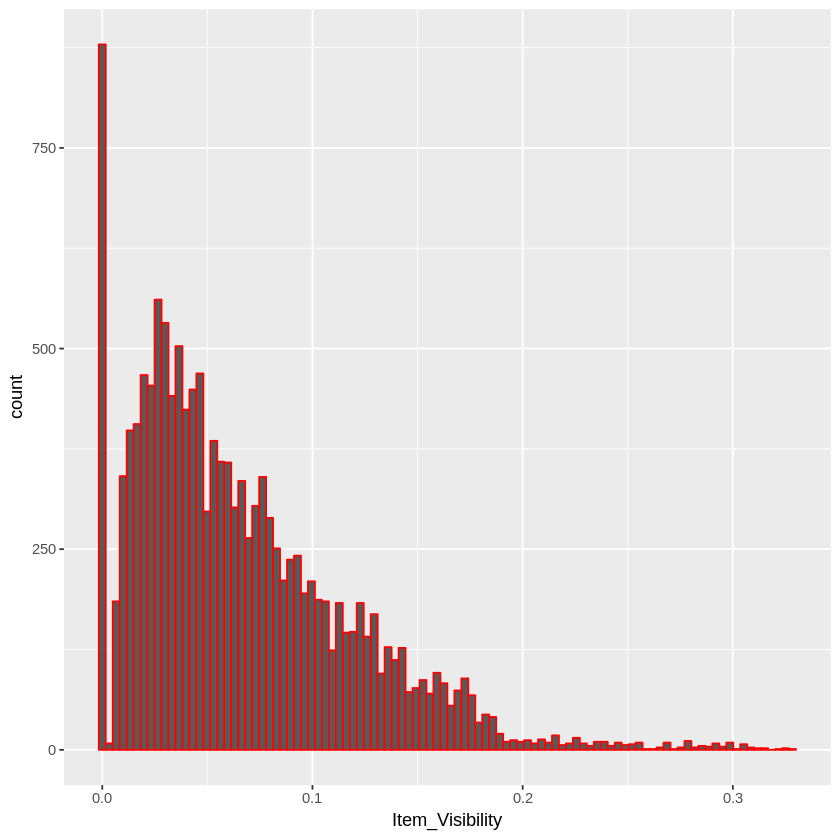

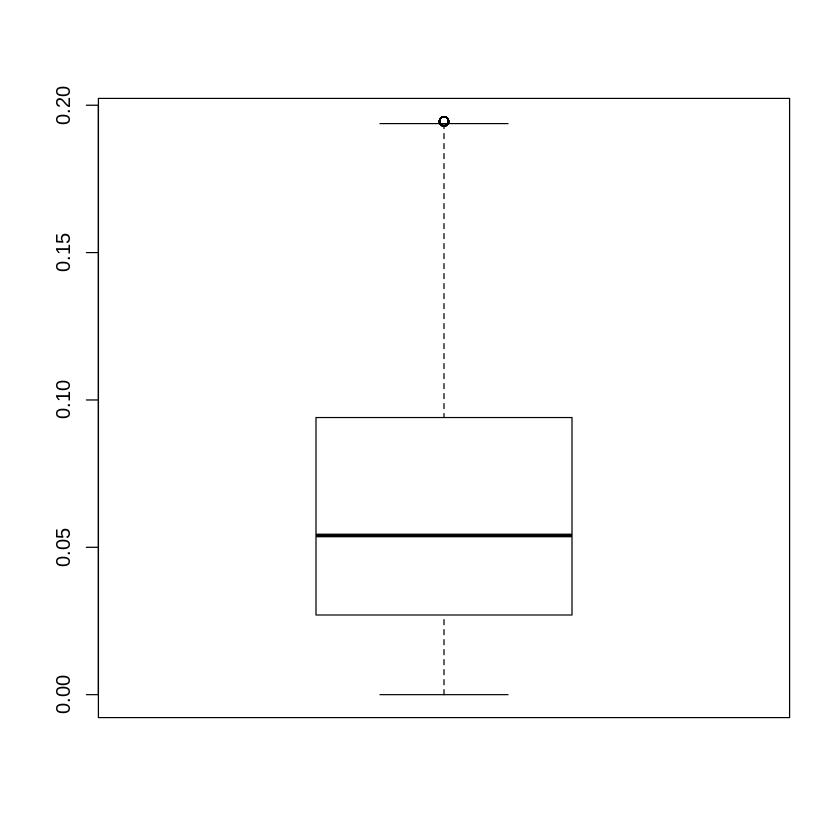

In [128]:

#removing outliers for item visibility

ggplot(master) + geom_histogram(aes(Item_Visibility), bins = 100,colour="red")
summary(master$Item_Visibility)
#as we can see there are outliers in item visibility , .we can replace the 0's 
#with winsorizing technique
#Quartile3 +1.5*IQR(variable)
#here 3rd Q = 0.094 +1.5*0.067(var)outlier is any data point more than 1.5 IQRs below the first quartile or
#above the third quartile. And 3 is just 1.5 doubled.

bench <- 0.09404 + 1.5*IQR(master$Item_Visibility)
bench
master$Item_Visibility[master$Item_Visibility > bench]<-bench

boxplot(master$Item_Visibility)

#creating  new var outlet year from establishment year of outlet

In [0]:

#Since we are only concerned with how old the outlet is, and not the establishment year
master$Outlet_Year <- 2018 - master$Outlet_Establishment_Year
master$Outlet_Year <- as.factor(master$Outlet_Year)


#encoding the categorical variables

In [130]:

#encoding categorical data

# 1 for Low Fat and 2 for Regular


master$Item_Fat_Content<-factor(master$Item_Fat_Content,
                                levels = c('Low Fat','Regular'),
                             labels = c(1,2))
head(master$Item_Fat_Content)


[1] 1 2 1 2 1 2
Levels: 1 2

In [131]:
#encoding the item type var

master$Item_Type<-factor(master$Item_Type,
                         levels = c('Baking Goods','Breads','Breakfast','Canned',
                                                     'Dairy','Frozen Foods','Fruits and Vegetables',
                                                      'Hard Drinks','Health and Hygiene','Household',
                                                       'Meat','Others','Seafood','Snack Foods',
                                                        'Soft Drinks','Starchy Foods'),
                        labels = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16))

  
head(master$Item_Type)

[1] 5  15 11 7  10 1 
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

In [132]:
        #encoding outlet_type 

master$Outlet_Type<- factor(master$Outlet_Type,
                            levels=c('Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'),
                            labels = c(1,2,3,4))

table(master$Outlet_Type)



   1    2    3    4 
1805 9294 1546 1559 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


   1    2    3 
1553 6203 6448 

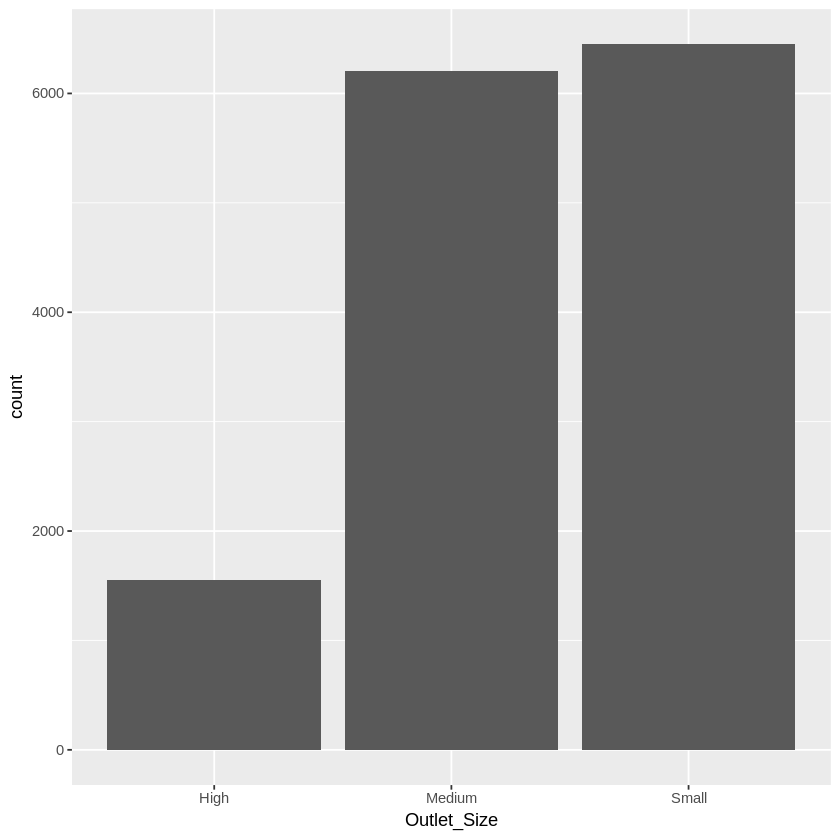

In [133]:

#encoding outlet size
ggplot(master)+geom_histogram(aes(Outlet_Size),stat='count')
master$Outlet_Size<-factor(master$Outlet_Size,
                           levels = c('High','Medium','Small'),
                           labels=c(1,2,3))
          
table(master$Outlet_Size)

#removing columns which aren''t required for model building

In [0]:

#removing the unused columns
master<-master[-c(1,7,8,13)]

#spliting the dataset again into train and test 70:30 ratio.

In [0]:

 train= master[1:8523,] # this will put the first 8523 rows into the training set</code>
   test= master[8524:14204,]#  this will put the remaining rows into the test set


#building the first linear model

In [136]:
regressor1<-lm(formula = Item_Outlet_Sales ~ .,
               data=train)
summary(regressor1)
#many of the vars are coming insignificant


Call:
lm(formula = Item_Outlet_Sales ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4329.0  -681.8   -89.0   568.6  7943.6 

Coefficients: (7 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.759e+03  1.388e+02 -12.671  < 2e-16 ***
Item_Weight                -1.523e-01  2.898e+00  -0.053  0.95809    
Item_Fat_Content2           4.080e+01  2.824e+01   1.445  0.14857    
Item_Visibility            -3.423e+02  2.608e+02  -1.312  0.18944    
Item_Type2                  5.381e+00  8.405e+01   0.064  0.94896    
Item_Type3                  7.713e+00  1.166e+02   0.066  0.94726    
Item_Type4                  2.561e+01  6.277e+01   0.408  0.68322    
Item_Type5                 -4.083e+01  6.226e+01  -0.656  0.51196    
Item_Type6                 -2.819e+01  5.888e+01  -0.479  0.63216    
Item_Type7                  2.954e+01  5.498e+01   0.537  0.59106    
Item_Type8             

#Building model with log of outlet sales

In [137]:
#let's try with the log of the item outlet sales
regressor2<-lm(formula = log(Item_Outlet_Sales) ~ .,
               data=train)
summary(regressor2)


Call:
lm(formula = log(Item_Outlet_Sales) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30730 -0.29477  0.06801  0.37825  1.35671 

Coefficients: (7 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.428e+00  6.612e-02  66.971  < 2e-16 ***
Item_Weight                -3.464e-04  1.380e-03  -0.251 0.801840    
Item_Fat_Content2           1.376e-02  1.345e-02   1.023 0.306414    
Item_Visibility            -9.704e-02  1.242e-01  -0.781 0.434774    
Item_Type2                  2.806e-02  4.004e-02   0.701 0.483366    
Item_Type3                 -6.850e-02  5.554e-02  -1.233 0.217511    
Item_Type4                  2.538e-02  2.990e-02   0.849 0.395978    
Item_Type5                 -6.877e-02  2.965e-02  -2.319 0.020417 *  
Item_Type6                 -5.434e-02  2.805e-02  -1.938 0.052710 .  
Item_Type7                 -4.614e-03  2.619e-02  -0.176 0.860166    
Item_Typ

#building model with square root of outlet sales

In [138]:

#let's do the sqrt of outlet sales
regressor3<-lm(formula = sqrt(Item_Outlet_Sales) ~ .,
               data=train)
summary(regressor3)



Call:
lm(formula = sqrt(Item_Outlet_Sales) ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.942  -6.674   0.080   7.021  42.890 

Coefficients: (7 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -5.245832   1.324832  -3.960 7.57e-05 ***
Item_Weight                -0.002483   0.027657  -0.090 0.928455    
Item_Fat_Content2           0.433174   0.269501   1.607 0.108022    
Item_Visibility            -2.840509   2.489302  -1.141 0.253866    
Item_Type2                  0.312529   0.802146   0.390 0.696830    
Item_Type3                 -0.623417   1.112830  -0.560 0.575352    
Item_Type4                  0.404264   0.599013   0.675 0.499768    
Item_Type5                 -0.919727   0.594157  -1.548 0.121671    
Item_Type6                 -0.618589   0.561939  -1.101 0.271010    
Item_Type7                  0.108971   0.524712   0.208 0.835485    
Item_Type8                 -